# IMAGE PROCESSING

SciPy, the main scientific Python library, contains a few image processing routines. scikit-image is another library dedicated to image processing. 

In [2]:
import numpy as np
import skimage
from skimage import img_as_float
import skimage.filters as skif
from skimage.color import rgb2gray
import skimage.data as skid
import skimage.exposure as skie
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

There are a few test images in scikit-image. Here is one:

In [3]:
chelsea = skid.chelsea()
chelsea.shape, chelsea.dtype

((300, 451, 3), dtype('uint8'))

We can display the image with matplotlib's ``imshow()`` function:

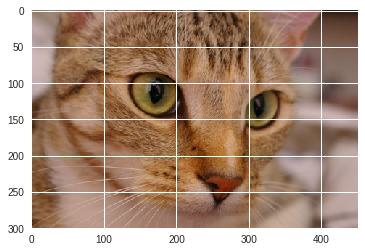

In [8]:
plt.imshow(chelsea)
# plt.axis('off')

We now convert this image to a grayscale image:

In [5]:
img = rgb2gray(chelsea)
img.shape, img.dtype

((300, 451), dtype('float64'))

(-0.5, 450.5, 299.5, -0.5)

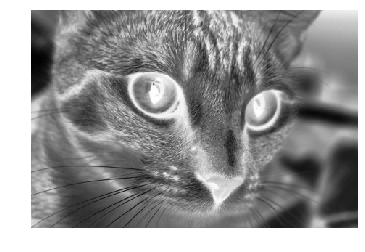

In [7]:
plt.imshow(img)
# plt.axis('off')

We are now going to analyze the histogram of these intensity values and tweak the exposure of the image. We will use three different methods and then create a simple
GUI to observe the results.

First, we'll use the ``rescale_intensity()`` function to stretch the intensity range of the image. This is a crude exposure adjustment method.

In [11]:
p2, p98 = np.percentile(img, (2, 98))
img_rescale = skie.rescale_intensity(img, in_range=(p2, p98))

(-0.5, 450.5, 299.5, -0.5)

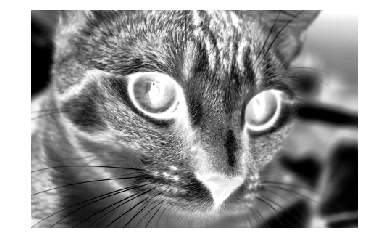

In [13]:
plt.imshow(img_rescale)
plt.axis('off')

Next, we use the ``equalize_hist()`` function to make the histogram approximately constant:

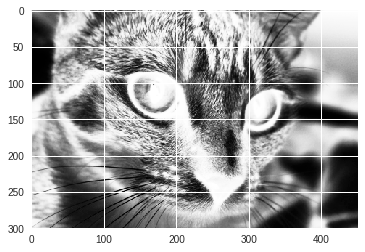

In [15]:
img_eq = skie.equalize_hist(img)
plt.imshow(img_eq)

We now use the Contrast Limited Adaptive Histogram Equalization algorithm, a more advanced histogram equalization method that enhances the image's contrast.

In [16]:
img_adapeq = img_as_float(skie.equalize_adapthist(img, clip_limit=0.03))

/home/fimplus/App/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


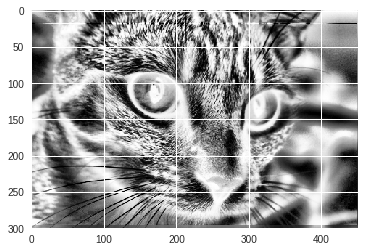

In [17]:
plt.imshow(img_adapeq)